<a href="https://colab.research.google.com/github/H4cksudo/wstg/blob/master/fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News detection

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [5]:
# Load the datasets
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')


In [6]:
# Display the first few rows of the training dataset
train_df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
# Check for missing values
train_df.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [8]:
# Fill missing values
train_df['author'].fillna('Unknown', inplace=True)
train_df['text'].fillna('', inplace=True)


## Data Visualization
Word Cloud for Reliable and Unreliable News

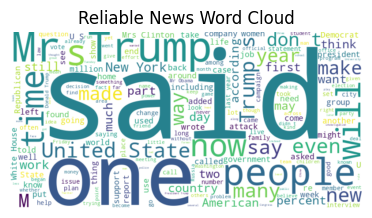

In [19]:
# Generate word clouds
reliable_text = ' '.join(train_df[train_df['label'] == 0]['text'])
unreliable_text = ' '.join(train_df[train_df['label'] == 1]['text'])

reliable_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reliable_text)
unreliable_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(unreliable_text)

# Plot the word clouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(reliable_wordcloud, interpolation='bilinear')
plt.title('Reliable News Word Cloud')
plt.axis('off')


plt.show()


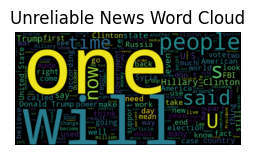

In [20]:

plt.subplot(1, 2, 2)
plt.imshow(unreliable_wordcloud, interpolation='bilinear')
plt.title('Unreliable News Word Cloud')
plt.axis('off')

plt.show()

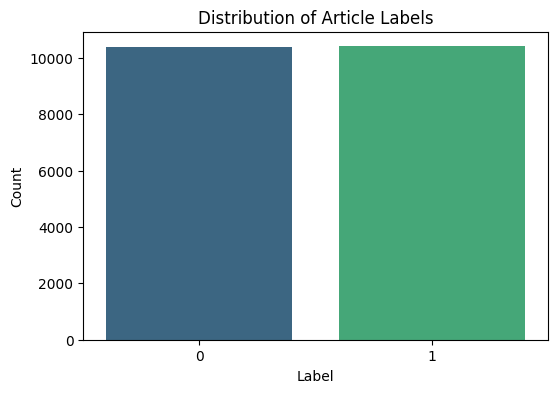

In [21]:
# Plot the distribution of article labels
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=train_df, palette='viridis')
plt.title('Distribution of Article Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


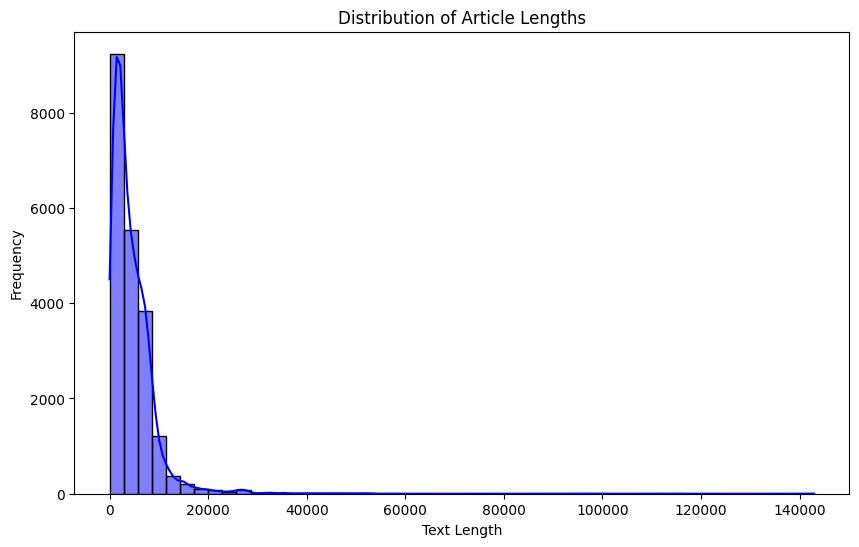

In [22]:
# Calculate the length of each article
train_df['text_length'] = train_df['text'].apply(len)

# Plot the distribution of article lengths
plt.figure(figsize=(10, 6))
sns.histplot(train_df['text_length'], bins=50, kde=True, color='blue')
plt.title('Distribution of Article Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


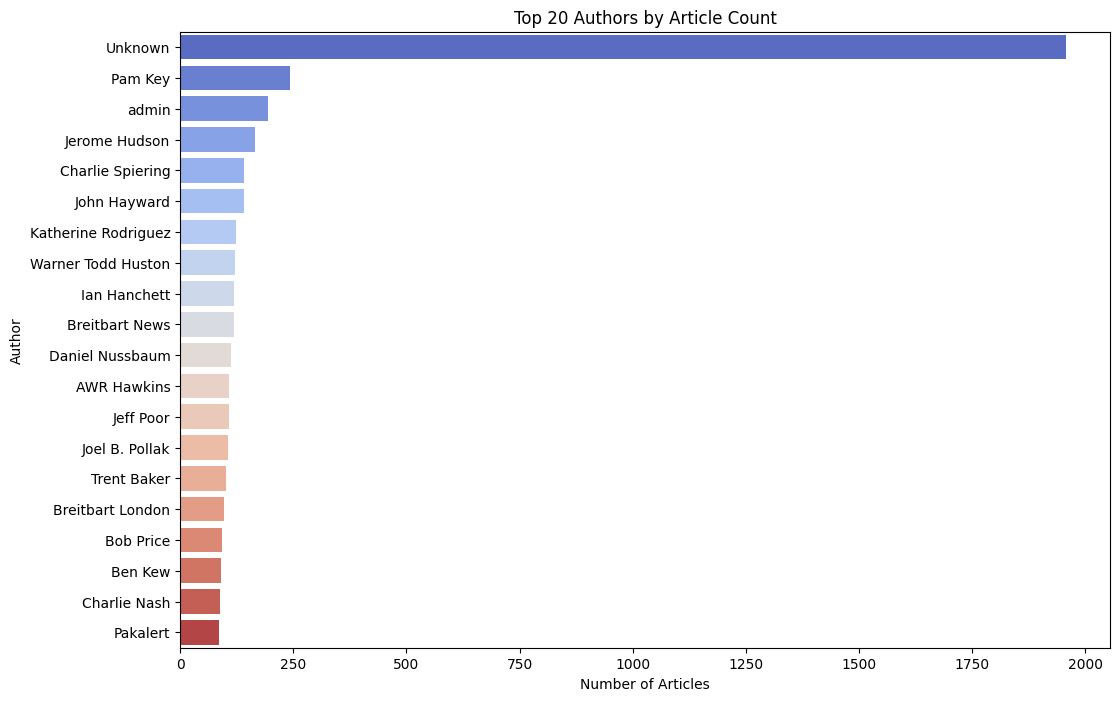

In [25]:
# Plot the distribution of articles by author
plt.figure(figsize=(12, 8))
author_counts = train_df['author'].value_counts().head(20)  # Top 20 authors
sns.barplot(x=author_counts.values, y=author_counts.index, palette='coolwarm')
plt.title('Top 20 Authors by Article Count')
plt.xlabel('Number of Articles')
plt.ylabel('Author')
plt.show()


## Feature Extraction

In [13]:
# Combine title and text for feature extraction
train_df['content'] = train_df['title'] + ' ' + train_df['text']
test_df['content'] = test_df['title'] + ' ' + test_df['text']

# Fill missing values in the content column
train_df['content'].fillna('', inplace=True)
test_df['content'].fillna('', inplace=True)

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(train_df['content'])
y = train_df['label']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Training

Validation Accuracy: 0.96


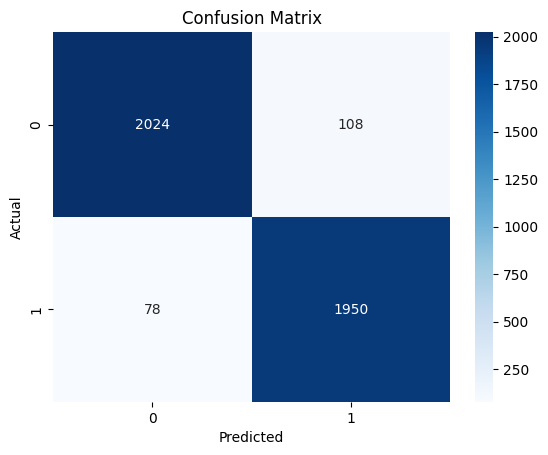

In [17]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

# Display the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [18]:
# Classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2132
           1       0.95      0.96      0.95      2028

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.96      4160
weighted avg       0.96      0.96      0.96      4160

